# GP01 GeoPandas
GeoPandas Full Documentation: https://geopandas.org/en/stable/docs.html
* pip install pandas
* pip install numpy
* pip install matplotlib
* pip install geopandas
* pip install folium (for interactive maps)
* pip install contextily (for overlaying base maps)
* pip install mapclassify (for choropleth maps)
* pip install ipyleaflet (for interactive maps in the Jupyter notebook)
* pip install plotly-express (for plotting data points on top of base maps)
* pip install tqdm (extensible progress meter)
* pip install osmnx (for retrieving geospatial data)
* pip install geofeather (for faster Geopandas data processing)
* pip install datashader (for quick representation of large datesets)
* pip install colorcet (for using perceptually uniform colormaps)
* pip install holoviews (for data analysis and visualisation)
* pip install geodatasets (Fetch links or download and cache spatial data example files.)
    * Available datsets: https://github.com/geopandas/geodatasets

* GeoPandas is built on top of Pandas and Numpy libraries.
* Similar to Pandas Dataframe, GeoPandas data structure contains GeodataFrame and GeoSeries. 
* GeoPandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library.
* This chapter covers some of the basics of loading and processing geographic data in GeoPandas.
___

## 1. Loading Spatial Data & Initial Plotting
Read and write geographic vector data in different formats (Shapefiles, Geopackage, Geojson ...etc):
* **read_file(path/to/file)**

In [1]:
# Library import + Data Load
import geopandas as gpd
import pandas as pd
c = gpd.read_file('localdata/countries.shp')
c.head(6)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Argentina,44293293,879400.0,2017,2010,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."


In [2]:
# Rows and columns of the dataframe
c.shape

(255, 12)

In [3]:
# Entries
c.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        255 non-null    object  
 1   POP_EST     255 non-null    int64   
 2   GDP_MD_EST  255 non-null    float64 
 3   POP_YEAR    255 non-null    int64   
 4   LASTCENSUS  255 non-null    int64   
 5   GDP_YEAR    255 non-null    int64   
 6   ECONOMY     255 non-null    object  
 7   INCOME_GRP  255 non-null    object  
 8   CONTINENT   255 non-null    object  
 9   REGION_UN   255 non-null    object  
 10  SUBREGION   255 non-null    object  
 11  geometry    255 non-null    geometry
dtypes: float64(1), geometry(1), int64(4), object(6)
memory usage: 24.0+ KB


In [4]:
# Column names
c.columns

Index(['NAME', 'POP_EST', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR',
       'ECONOMY', 'INCOME_GRP', 'CONTINENT', 'REGION_UN', 'SUBREGION',
       'geometry'],
      dtype='object')

In [5]:
# Basic statistical info
c.describe()

,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.550000e+02,2.550000e+02,255.000000,255.000000,255.000000
mean,2.904118e+07,4.675778e+05,2000.905882,1625.956863,1991.670588
std,1.230041e+08,1.929783e+06,178.257618,810.868429,217.745556
min,0.000000e+00,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.099345e+05,2.562000e+03,2017.000000,2000.000000,2016.000000
50%,4.292095e+06,3.177000e+04,2017.000000,2006.000000,2016.000000
75%,1.783726e+07,1.857000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,2.114000e+07,2017.000000,2012.000000,2016.000000


<Axes: >

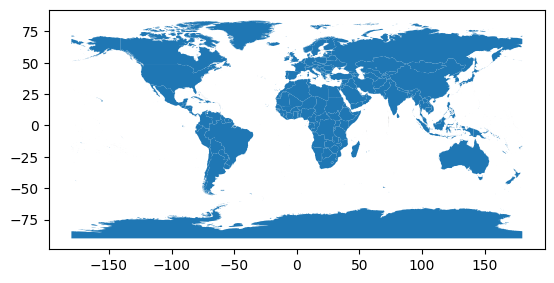

In [6]:
# Plot data as a simple map with the GeodataFrame plot method: .plot()
c.plot()

___
## 2. Loading CSV with Pandas & GeoDataFrame Conversion
Many datasets have geographic component (Latitude/Longitude) allows easy conversion into geometry and could further be used for spatial data analysis.

In [2]:
# Dataset: World conflicts 2019
df = pd.read_csv('localdata/acled2019.csv')
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,Bhubaneswar,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,Huizucar,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV


In [8]:
# Rows and columns of the dataframe
df.shape

(198761, 31)

<Axes: >

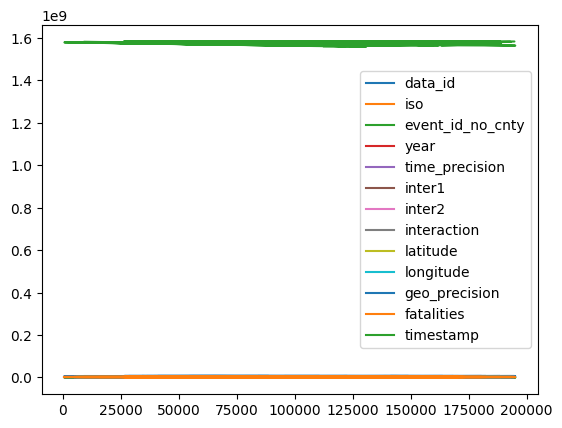

In [9]:
df.sample(100).plot()

#### Conversion of latitude & longitude into Geometry
Points and sets objects as a geometry while creating the Geodataframe: **points_from_xy()**

In [10]:
# Conversion of latitude & longitude into Geometry: points_from_xy()
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


<Axes: >

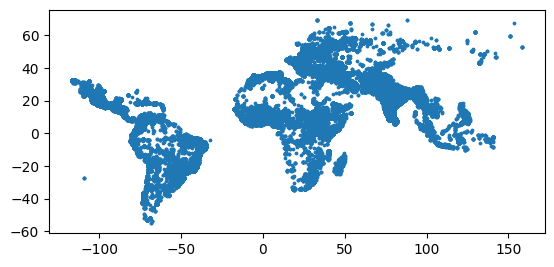

In [11]:
# Locations of the world conflicts
gdf.plot(markersize=3)

#### Data Writing into Spatial Format
Conversion of CSV data so that its Spatial format can be directly loaded:
* **Shapefile**
* **GeoJSON**

In [12]:
# IMPORTANT NOTE: The directory folder, Output was created beforehand to contain the export files. The process may take some time (~60s) due to large sizes files are being created.
# Shapefile (.shp extension): .to_file()
# crs = coordinates reference system
# Files output includes .cpg, .dbf, .prj, .shp, .shx
gdf.to_file("localdata/acled2019.shp", crs='epsg:4326')

C:\Users\likre\AppData\Local\Temp\ipykernel_76568\3033942045.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("Output/acled2019.shp", crs={'init' :'epsg:4326'})
c:\Users\likre\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
# GeoJSON (.geojson extension): .to_file()
# Indicate driver='GeoJSON'
gdf.sample(1000).to_file("local/acled2019-Geojson.geojson", driver='GeoJSON')

___